# Distribuciones y Dummy data sets

**Explicación Data Wrangling ->** https://www.notion.so/Data-Wrangling-a336f65b7533411aa28bca300307a963

**Explicación Distribuciones y Dummy datasets ->** https://www.notion.so/2-Distribuciones-y-Dummy-data-sets-f7b114f877df49788b2e8aac79d9f21b

**Librerías, Funciones:**
- *Pandas* -> read_csv, DataFrame
- *Python* -> range, tolist, append, float, index, describe
- *Numpy* -> sqrt, random [uniform, randomn]
- *Matplotlib.pyplot* -> hist, plot

**Índice:**

0. Preparación previa
1. Funciones de distribución de probabilidades
1. 1. Distribución **uniforme**
1. 2.Distribución **normal**
1. 3. Distribución normal - **no tipificada**
1. 4. La simulación de **Monte Carlo*
2. Generación de **Dummy Data sets**


## *Preparación previa:*

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
%matplotlib inline 

In [31]:
mainpath = "/Users/irene/Documents/GitHub/python-ml-course/datasets"  #Ruta ficheros
filename1 = "customer-churn-model/Customer Churn Model.txt" #Fichero a abrir
fullpath1 = mainpath + "/" + filename1 #Ruta completa

df1 = pd.read_csv(fullpath1)
df1.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# 1. Funciones de distribución de probabilidades

## 1.1. Distribución Uniforme

(array([ 99504., 100017., 100426., 100611.,  99820.,  99739.,  99612.,
         99977., 100098., 100196.]),
 array([ 1.00038179, 10.90033626, 20.80029072, 30.70024519, 40.60019965,
        50.50015412, 60.40010858, 70.30006305, 80.20001751, 90.09997197,
        99.99992644]),
 <BarContainer object of 10 artists>)

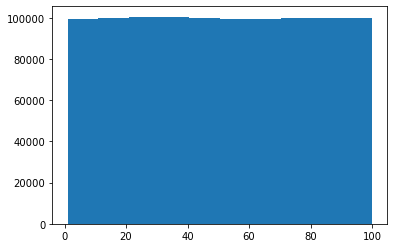

In [32]:
a = 1 #Rango inferior
b = 100 #Rango superior
n = 1000000 #Nº de muestras, a mayor número, más uniforme.

df2 = np.random.uniform(a,b,n)

plt.hist(df2)

## 1.2. Distribución Normal (Campana de Gauss)

(array([4.20000e+01, 1.31400e+03, 1.88670e+04, 1.17871e+05, 3.12316e+05,
        3.49133e+05, 1.64970e+05, 3.26850e+04, 2.71000e+03, 9.20000e+01]),
 array([-4.94269495, -3.97846811, -3.01424127, -2.05001443, -1.08578759,
        -0.12156075,  0.84266609,  1.80689293,  2.77111977,  3.7353466 ,
         4.69957344]),
 <BarContainer object of 10 artists>)

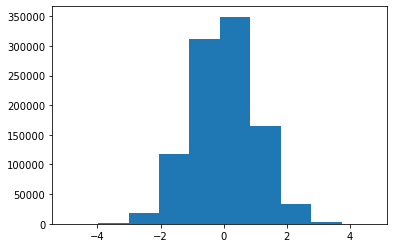

In [33]:
df3 = np.random.randn(n) #Para generar n valores con forma de distrib normal

plt.hist(df3)

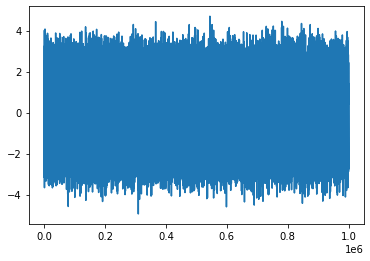

In [34]:
x = range(0,n)
plt.plot(x,df3) #Para ver el conjunto de valores que han ido saliendo:

### 1.2.1. Distribución normal - no tipificada:

Una distribución normal tificada tiene media 0 y desv.típica 1

(array([4.70000e+01, 1.58200e+03, 2.11830e+04, 1.22542e+05, 3.07949e+05,
        3.41396e+05, 1.66520e+05, 3.52810e+04, 3.37600e+03, 1.24000e+02]),
 array([-6.55305967, -4.20099967, -1.84893968,  0.50312032,  2.85518032,
         5.20724032,  7.55930031,  9.91136031, 12.26342031, 14.6154803 ,
        16.9675403 ]),
 <BarContainer object of 10 artists>)

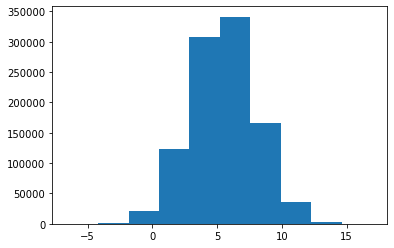

In [35]:
mu = 5.5 #Media
sd = 2.5 #Desviación std
Z = np.random.randn(n) #Distribución normal

df4 = mu + sd * Z # Th central del límite -> Z = (X-mu) / sd -> X = mu + sd * z
plt.hist(df4)

In [36]:
df5 = np.random.randn(2,4) #Devuélveme 2 colecciones con 4 elementos cada una
df5

array([[ 0.67304793, -0.40410864, -0.39723679, -0.49959655],
       [-0.03629986,  2.03322586,  0.16950523, -0.66014137]])

### 1.2.2. La simulación de Monte Carlo

**Explicación:** https://www.notion.so/Funciones-de-distribuci-n-de-probabilidades-19b3cd88398641e79155a02474d6f6f9

**Pasos:**
1. Sobre los 2 ejes (x,y) generamos 1 punto aleatorio (x,y) con valores entre 0 y 1, un total 1000 veces (n)
2. Calculamos la distancia de el radio de ese punto respecto al centro -> R = raíz de (x^2 + y^2) (pitágoras) *
    2.1. Si R<1 -> estamos dentro del círculo.
    2.2. Si R>1 -> estamos fuera del círculo.
3. Calculamos el [nº total de veces] que está dentro del círculo y lo dividimos entre el [nº total de intentos] para obtener una aproximación de la P de caer dentro del círculo.
4. Usamos dicha P para aproximar el valor de pi
5. Repetimos el experimento un nº suficiente de veces (ej: n_exp=100) para obtener diferentes aproximaciones de π
6. Calcular el promedio de los 100 experimentos anteriores para dar con un valor diferente de π

In [37]:
def pi_montecarlo(n, n_exp): 

    pi_avg = 0 #Pi empezará por valer 0
    pi_value_list = [] #Lista a rellenar con los valores de π que vayamos obteniendo
    
    for i in range (n_exp): #n_exp = veces que repetimos el experimento
        value = 0 #Casos favorables
        #Generamos dos listas con n valores de Xs e Ys (n nºs aleatorios uniformes entre 0 y 1)
        x = np.random.uniform(0,1,n).tolist() 
        y = np.random.uniform(0,1,n).tolist() 
        for j in range (n): #n = cada vez que hago el experimento, genero n puntos
            z = np.sqrt(x[j]*x[j] + y[j]*y[j]) #Calculo el R
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = (float_value * 4)/n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg / n_exp #n_exp = veces que repetimos el experimento
    print(pi)

    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.140360000000003


(3.140360000000003, [<matplotlib.lines.Line2D at 0x7fdea08fa2e0>])

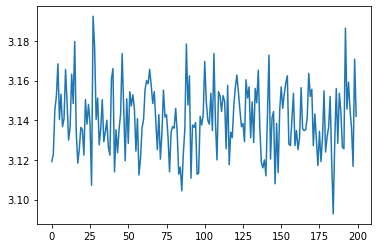

In [38]:
pi_montecarlo(10000,200) 

# 2. Generación de Dummy Data Sets

Dummy dataset = lista/array de nºs aleatorios.

In [45]:
column_names = df1.columns.values.tolist()
column_names

['State',
 'Account Length',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?']

In [53]:
a = len(column_names)
n=a #nº de filas

df6 = pd.DataFrame( #Diccionario -> DataFrame 
    { 
        #Diferentes métodos para rellenar columnas con nºs aleatorios
        'Column Name': column_names,
        'Columna_A': np.random.randn(a), #Se distribuyen según la normal (0, 1)
        'Columna_B': 0.5 + 2.5*np.random.randn(a), #Según normal no tipificada (0.5, 2.5)
        'Columna_C': np.random.uniform(5, 32, a) #Distrib. uniforme 
    }, index=range(42, 42 + a)   #Para modificar el nº de inicio (índice)
)

df6.head(2)

,Column Name,Columna_A,Columna_B,Columna_C
42,State,2.585642,3.794971,27.913532
43,Account Length,0.833488,-0.935529,21.327527


In [54]:
df6.describe()

,Columna_A,Columna_B,Columna_C
count,21.000000,21.000000,21.000000
mean,-0.184699,0.743268,17.986807
std,1.358822,2.199630,8.313110
min,-2.154453,-1.867075,6.372607
25%,-1.145530,-0.796187,11.806619
50%,-0.575272,0.348996,18.906785
75%,0.512661,1.971598,23.013744
max,2.585642,7.537519,31.755130
